## Profit and waste Analysis of Repeating Menu Systems in a Small Scale Filipino Eatery

### Data Collection 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylatex


data=pd.read_excel("dataset.xlsx")
data

,Date,Day,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit
0,2025-01-06,Monday,Sinigang na Baboy,Soup,556,60,12,12,0,720,164
1,2025-01-06,Monday,Chicken Adobo,Chicken,619,60,13,10,3,600,-19
2,2025-01-06,Monday,Dinakdakan,Pork,969,80,14,13,1,1040,71
3,2025-01-06,Monday,Dinakdakan,Pork,865,80,12,11,1,880,15
4,2025-01-06,Monday,Paksiw na Bangus,Fish,336,60,15,15,0,900,564
...,...,...,...,...,...,...,...,...,...,...,...
175,2025-02-01,Saturday,Pork Adobo,Pork,558,60,13,12,1,720,162
176,2025-02-01,Saturday,Fried Salmon,Fish,291,50,14,12,2,600,309
177,2025-02-01,Saturday,Fried Salmon,Fish,303,50,15,14,1,700,397
178,2025-02-01,Saturday,Chopsuey,Vegetable,270,40,15,15,0,600,330


In [195]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Date           180 non-null    str  
 1   Day            180 non-null    str  
 2   Dish           180 non-null    str  
 3   Dish_Type      180 non-null    str  
 4   Cost_PHP       180 non-null    int64
 5   Price_PHP      180 non-null    int64
 6   Total_Serving  180 non-null    int64
 7   Sold           180 non-null    int64
 8   Unsold         180 non-null    int64
 9   Revenue        180 non-null    int64
 10  Profit         180 non-null    int64
dtypes: int64(7), str(4)
memory usage: 21.7 KB


In [196]:
data.head(20)

,Date,Day,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit
0,2025-01-06,Monday,Sinigang na Baboy,Soup,556,60,12,12,0,720,164
1,2025-01-06,Monday,Chicken Adobo,Chicken,619,60,13,10,3,600,-19
2,2025-01-06,Monday,Dinakdakan,Pork,969,80,14,13,1,1040,71
3,2025-01-06,Monday,Dinakdakan,Pork,865,80,12,11,1,880,15
4,2025-01-06,Monday,Paksiw na Bangus,Fish,336,60,15,15,0,900,564
5,2025-01-06,Monday,Fried Tilapia,Fish,273,60,15,15,0,900,627
6,2025-01-06,Monday,Chopsuey,Vegetable,230,40,15,14,1,560,330
7,2025-01-06,Monday,Beef Steak,Beef,859,80,14,13,1,1040,181
8,2025-01-07,Tuesday,Sinigang na Baboy,Soup,596,60,10,10,0,600,4
9,2025-01-07,Tuesday,Chicken Adobo,Chicken,655,60,12,10,2,600,-55


### Data Cleaning and Preporcessing

In [197]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Date           180 non-null    str  
 1   Day            180 non-null    str  
 2   Dish           180 non-null    str  
 3   Dish_Type      180 non-null    str  
 4   Cost_PHP       180 non-null    int64
 5   Price_PHP      180 non-null    int64
 6   Total_Serving  180 non-null    int64
 7   Sold           180 non-null    int64
 8   Unsold         180 non-null    int64
 9   Revenue        180 non-null    int64
 10  Profit         180 non-null    int64
dtypes: int64(7), str(4)
memory usage: 21.7 KB


In [198]:
data['Date'] = pd.to_datetime(data['Date'])



In [199]:
# aggregate by week
data['Date'] = pd.to_datetime(data['Date'])
data['Week'] = data['Date'].dt.isocalendar().week
data['Week'] = data['Week'] - data['Week'].min() + 1  # normalize to start at 1

weekly_summary = data.groupby('Week').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Price_PHP=('Price_PHP', 'sum'),
    Total_Serving=('Total_Serving', 'sum'),
    Number_Sold=('Sold', 'sum'),
    Unsold_Quantity=('Unsold', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
)

weekly_summary['Loss_PHP'] = (data['Price_PHP'] * data['Unsold']).groupby(data['Week']).sum()

weekly_summary

,Cost_PHP,Price_PHP,Total_Serving,Number_Sold,Unsold_Quantity,Revenue,Profit,Loss_PHP
Week,,,,,,,,
1,25534,2770,582,546,36,33730,8196,2120
2,27297,2820,601,563,38,34570,7273,2210
3,24042,2630,586,545,41,32620,8578,2430
4,26349,2740,593,555,38,33890,7541,2170


In [200]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           180 non-null    datetime64[us]
 1   Day            180 non-null    str           
 2   Dish           180 non-null    str           
 3   Dish_Type      180 non-null    str           
 4   Cost_PHP       180 non-null    int64         
 5   Price_PHP      180 non-null    int64         
 6   Total_Serving  180 non-null    int64         
 7   Sold           180 non-null    int64         
 8   Unsold         180 non-null    int64         
 9   Revenue        180 non-null    int64         
 10  Profit         180 non-null    int64         
 11  Week           180 non-null    UInt32        
dtypes: UInt32(1), datetime64[us](1), int64(7), str(3)
memory usage: 20.8 KB


In [201]:
data_encoded = pd.get_dummies(data, columns=['Dish_Type'], drop_first=True)

for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col] = pd.Categorical(data_encoded[col]).codes

data_encoded.head()

C:\Users\Vernon\AppData\Local\Temp\ipykernel_21400\3337056447.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in data_encoded.select_dtypes(include=['object']).columns:


,Date,Day,Dish,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Week,Dish_Type_Chicken,Dish_Type_Fish,Dish_Type_Pork,Dish_Type_Soup,Dish_Type_Vegetable
0,2025-01-06,1,20,556,60,12,12,0,720,164,1,False,False,False,True,False
1,2025-01-06,1,1,619,60,13,10,3,600,-19,1,True,False,False,False,False
2,2025-01-06,1,5,969,80,14,13,1,1040,71,1,False,False,True,False,False
3,2025-01-06,1,5,865,80,12,11,1,880,15,1,False,False,True,False,False
4,2025-01-06,1,17,336,60,15,15,0,900,564,1,False,True,False,False,False


In [202]:
data_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 180 non-null    datetime64[us]
 1   Day                  180 non-null    int8          
 2   Dish                 180 non-null    int8          
 3   Cost_PHP             180 non-null    int64         
 4   Price_PHP            180 non-null    int64         
 5   Total_Serving        180 non-null    int64         
 6   Sold                 180 non-null    int64         
 7   Unsold               180 non-null    int64         
 8   Revenue              180 non-null    int64         
 9   Profit               180 non-null    int64         
 10  Week                 180 non-null    UInt32        
 11  Dish_Type_Chicken    180 non-null    bool          
 12  Dish_Type_Fish       180 non-null    bool          
 13  Dish_Type_Pork       180 non-null    bool     

##### Feature Engineering

In [203]:

data['Waste_Rate'] = data['Unsold'] / data['Total_Serving']
data['Profit_Margin'] = data['Profit'] / data['Revenue']
data['Sell_Through_Rate'] = data['Sold'] / data['Total_Serving']
data['cost_ratio'] = data['Cost_PHP'] / data['Revenue']

data_encoded['Waste_Rate'] = data['Unsold'] / data['Total_Serving']
data_encoded['Profit_Margin'] = data['Profit'] / data['Revenue']
data_encoded['Sell_Through_Rate'] = data['Sold'] / data['Total_Serving']
data_encoded['cost_ratio'] = data['Cost_PHP'] / data['Revenue']


### Exploratory Data Analysis

In [204]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Week               180 non-null    UInt32        
 12  Waste_Rate         180 non-null    float64       
 13  Profit_Margin      180 non-null    float64       
 14  Sell_Through_Rate  18

In [205]:
data.describe()

,Date,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Week,Waste_Rate,Profit_Margin,Sell_Through_Rate,cost_ratio
count,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0,180.000000,180.000000,180.000000,180.000000
mean,2025-01-18 22:24:00,573.455556,60.888889,13.122222,12.272222,0.850000,748.944444,175.488889,2.494444,0.064091,0.240107,0.935909,0.759893
min,2025-01-06 00:00:00,227.000000,40.000000,10.000000,9.000000,0.000000,400.000000,-247.000000,1.0,0.000000,-0.411667,0.750000,0.303333
25%,2025-01-12 12:00:00,322.250000,60.000000,12.000000,11.000000,0.000000,600.000000,29.000000,1.75,0.000000,0.034226,0.904167,0.511458
50%,2025-01-18 00:00:00,610.000000,60.000000,13.000000,12.000000,1.000000,720.000000,184.000000,2.0,0.066667,0.217917,0.933333,0.782083
75%,2025-01-25 12:00:00,767.000000,70.000000,14.000000,14.000000,1.250000,850.000000,297.000000,3.25,0.095833,0.488542,1.000000,0.965774
max,2025-02-01 00:00:00,1012.000000,80.000000,15.000000,15.000000,3.000000,1200.000000,627.000000,4.0,0.250000,0.696667,1.000000,1.411667
std,NaN,233.560187,11.641233,1.388925,1.563660,0.948242,184.152891,178.955707,1.121139,0.072163,0.253175,0.072163,0.253175


In [206]:
data.groupby('Dish').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Dish,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,Beef Steak,10160,13040,2880,400,0.029365,0.216245,0.970635
1,Chicken Adobo,2519,2400,-119,600,0.200321,-0.052172,0.799679
2,Chicken BBQ,1282,1150,-132,150,0.107143,-0.114545,0.892857
3,Chicken Curry,6498,6480,-18,960,0.132519,-0.029986,0.867481
4,Chopsuey,2251,4480,2229,280,0.058893,0.491883,0.941107
5,Dinakdakan,10326,11440,1114,320,0.028139,0.089863,0.971861
6,Fried Salmon,2944,6200,3256,500,0.076337,0.518489,0.923663
7,Fried Tilapia,1729,4560,2831,420,0.088217,0.611713,0.911783
8,Ginataang Kalabasa,1225,2680,1455,120,0.042051,0.540939,0.957949
9,Ginataang Pagi,3420,4440,1020,240,0.052503,0.218704,0.947497


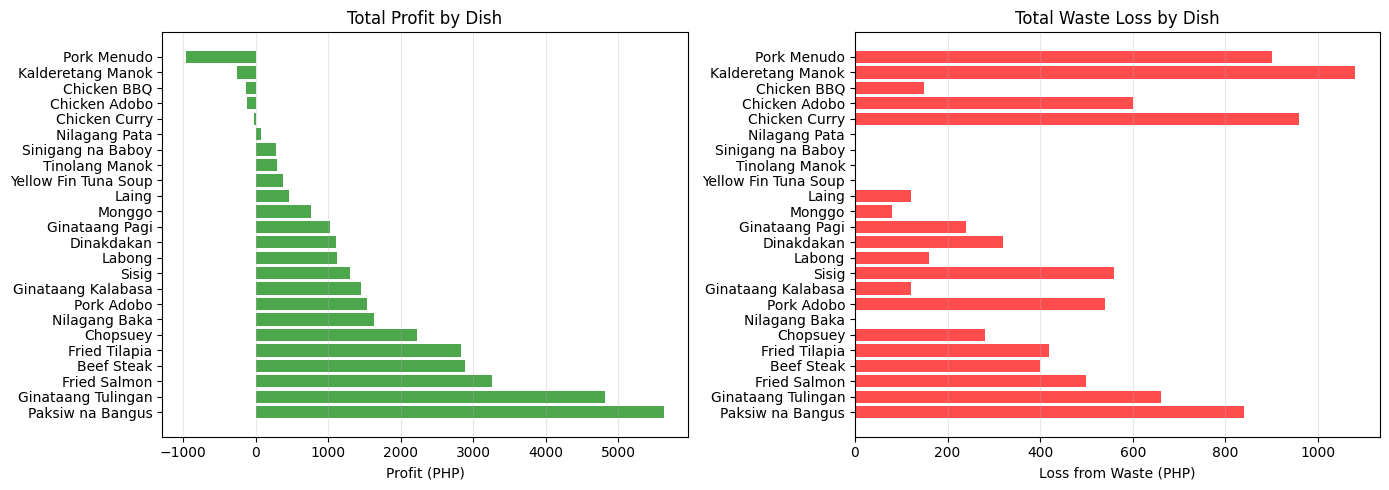

In [207]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dish_summary = data.groupby('Dish').agg(
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum())
).sort_values('Profit', ascending=False)

# Plot 1: Profit by Dish
axes[0].barh(dish_summary.index, dish_summary['Profit'], color='green', alpha=0.7)
axes[0].set_xlabel('Profit (PHP)')
axes[0].set_title('Total Profit by Dish')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Waste (Loss) by Dish
axes[1].barh(dish_summary.index, dish_summary['Loss_PHP'], color='red', alpha=0.7)
axes[1].set_xlabel('Loss from Waste (PHP)')
axes[1].set_title('Total Waste Loss by Dish')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [208]:
data.groupby('Dish_Type').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Dish_Type,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,Beef,10160,13040,2880,400,0.029365,0.216245,0.970635
1,Chicken,16550,16030,-520,2790,0.149168,-0.051121,0.850832
2,Fish,17099,34640,17541,2660,0.072707,0.498084,0.927293
3,Pork,38657,41660,3003,2320,0.055922,0.057715,0.944078
4,Soup,14746,17400,2654,0,0.000000,0.136955,1.000000
5,Vegetable,6010,12040,6030,760,0.059577,0.495252,0.940423


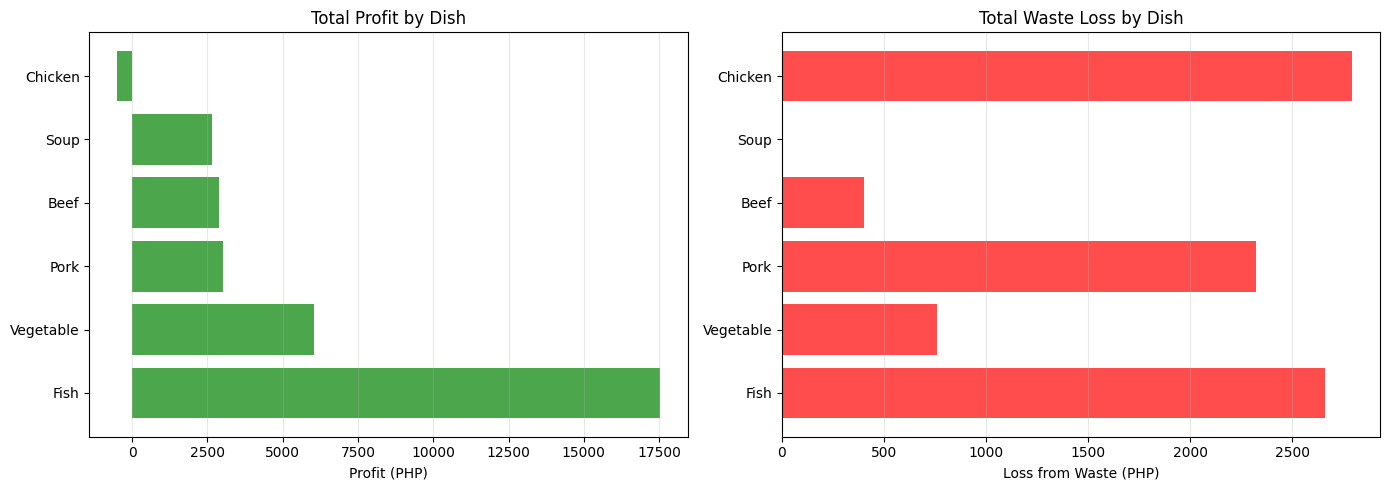

In [209]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dish_summary = data.groupby('Dish_Type').agg(
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum())
).sort_values('Profit', ascending=False)

# Plot 1: Profit by Dish
axes[0].barh(dish_summary.index, dish_summary['Profit'], color='green', alpha=0.7)
axes[0].set_xlabel('Profit (PHP)')
axes[0].set_title('Total Profit by Dish')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Waste (Loss) by Dish
axes[1].barh(dish_summary.index, dish_summary['Loss_PHP'], color='red', alpha=0.7)
axes[1].set_xlabel('Loss from Waste (PHP)')
axes[1].set_title('Total Waste Loss by Dish')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [210]:
daily_summary = data.groupby('Date').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()
daily_summary

,Date,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,2025-01-06,4707,6640,1933,460,0.065453,0.296010,0.934547
1,2025-01-07,3887,4650,763,270,0.055442,0.183037,0.944558
2,2025-01-08,4574,6000,1426,500,0.078869,0.215726,0.921131
3,2025-01-09,3718,5350,1632,160,0.032182,0.318500,0.967818
4,2025-01-10,3733,4660,927,360,0.069597,0.206164,0.930403
5,2025-01-11,4915,6430,1515,370,0.072917,0.254754,0.927083
6,2025-01-13,4859,6330,1471,380,0.061310,0.232995,0.938690
7,2025-01-14,4865,6120,1255,480,0.071795,0.224198,0.928205
8,2025-01-15,4538,5860,1322,180,0.026786,0.248333,0.973214
9,2025-01-16,4095,5270,1175,220,0.041706,0.226728,0.958294


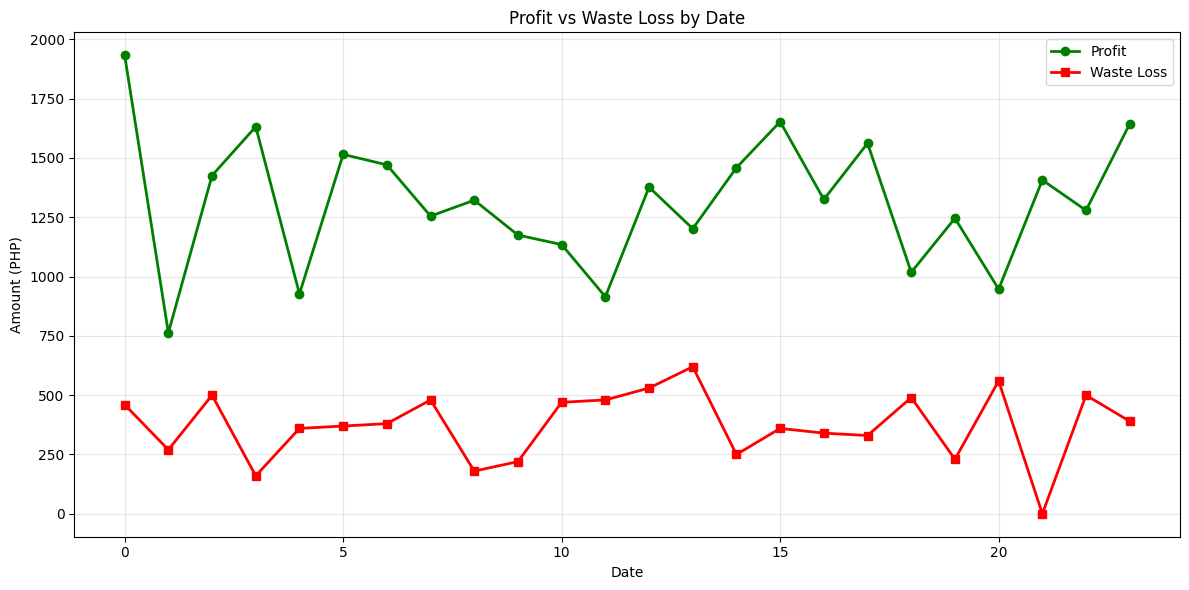

In [211]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(daily_summary.index, daily_summary['Profit'], marker='o', label='Profit', color='green', linewidth=2)
ax.plot(daily_summary.index, daily_summary['Loss_PHP'], marker='s', label='Waste Loss', color='red', linewidth=2)

ax.set_xlabel('Date')
ax.set_ylabel('Amount (PHP)')
ax.set_title('Profit vs Waste Loss by Date')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [212]:
data.groupby('Week').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Week,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,1,25534,33730,8196,2120,0.063077,0.246352,0.936923
1,2,27297,34570,7273,2210,0.060424,0.224773,0.939576
2,3,24042,32620,8578,2430,0.068419,0.268632,0.931581
3,4,26349,33890,7541,2170,0.064624,0.221647,0.935376


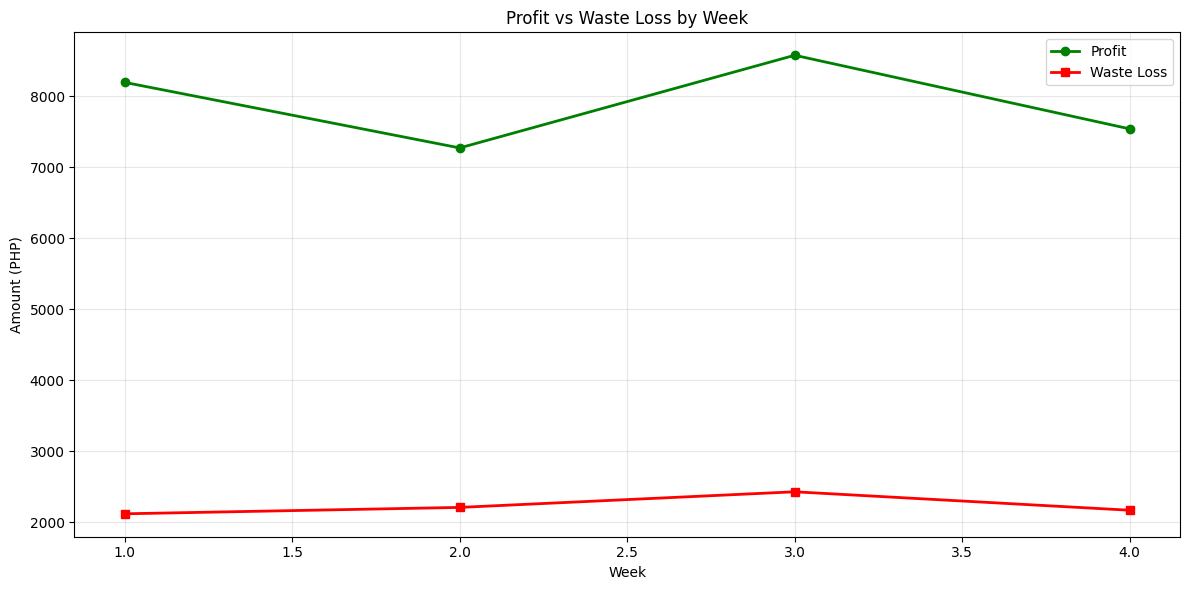

In [213]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(weekly_summary.index, weekly_summary['Profit'], marker='o', label='Profit', color='green', linewidth=2)
ax.plot(weekly_summary.index, weekly_summary['Loss_PHP'], marker='s', label='Waste Loss', color='red', linewidth=2)

ax.set_xlabel('Week')
ax.set_ylabel('Amount (PHP)')
ax.set_title('Profit vs Waste Loss by Week')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [214]:
data_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 180 non-null    datetime64[us]
 1   Day                  180 non-null    int8          
 2   Dish                 180 non-null    int8          
 3   Cost_PHP             180 non-null    int64         
 4   Price_PHP            180 non-null    int64         
 5   Total_Serving        180 non-null    int64         
 6   Sold                 180 non-null    int64         
 7   Unsold               180 non-null    int64         
 8   Revenue              180 non-null    int64         
 9   Profit               180 non-null    int64         
 10  Week                 180 non-null    UInt32        
 11  Dish_Type_Chicken    180 non-null    bool          
 12  Dish_Type_Fish       180 non-null    bool          
 13  Dish_Type_Pork       180 non-null    bool     

### Statistical Tests

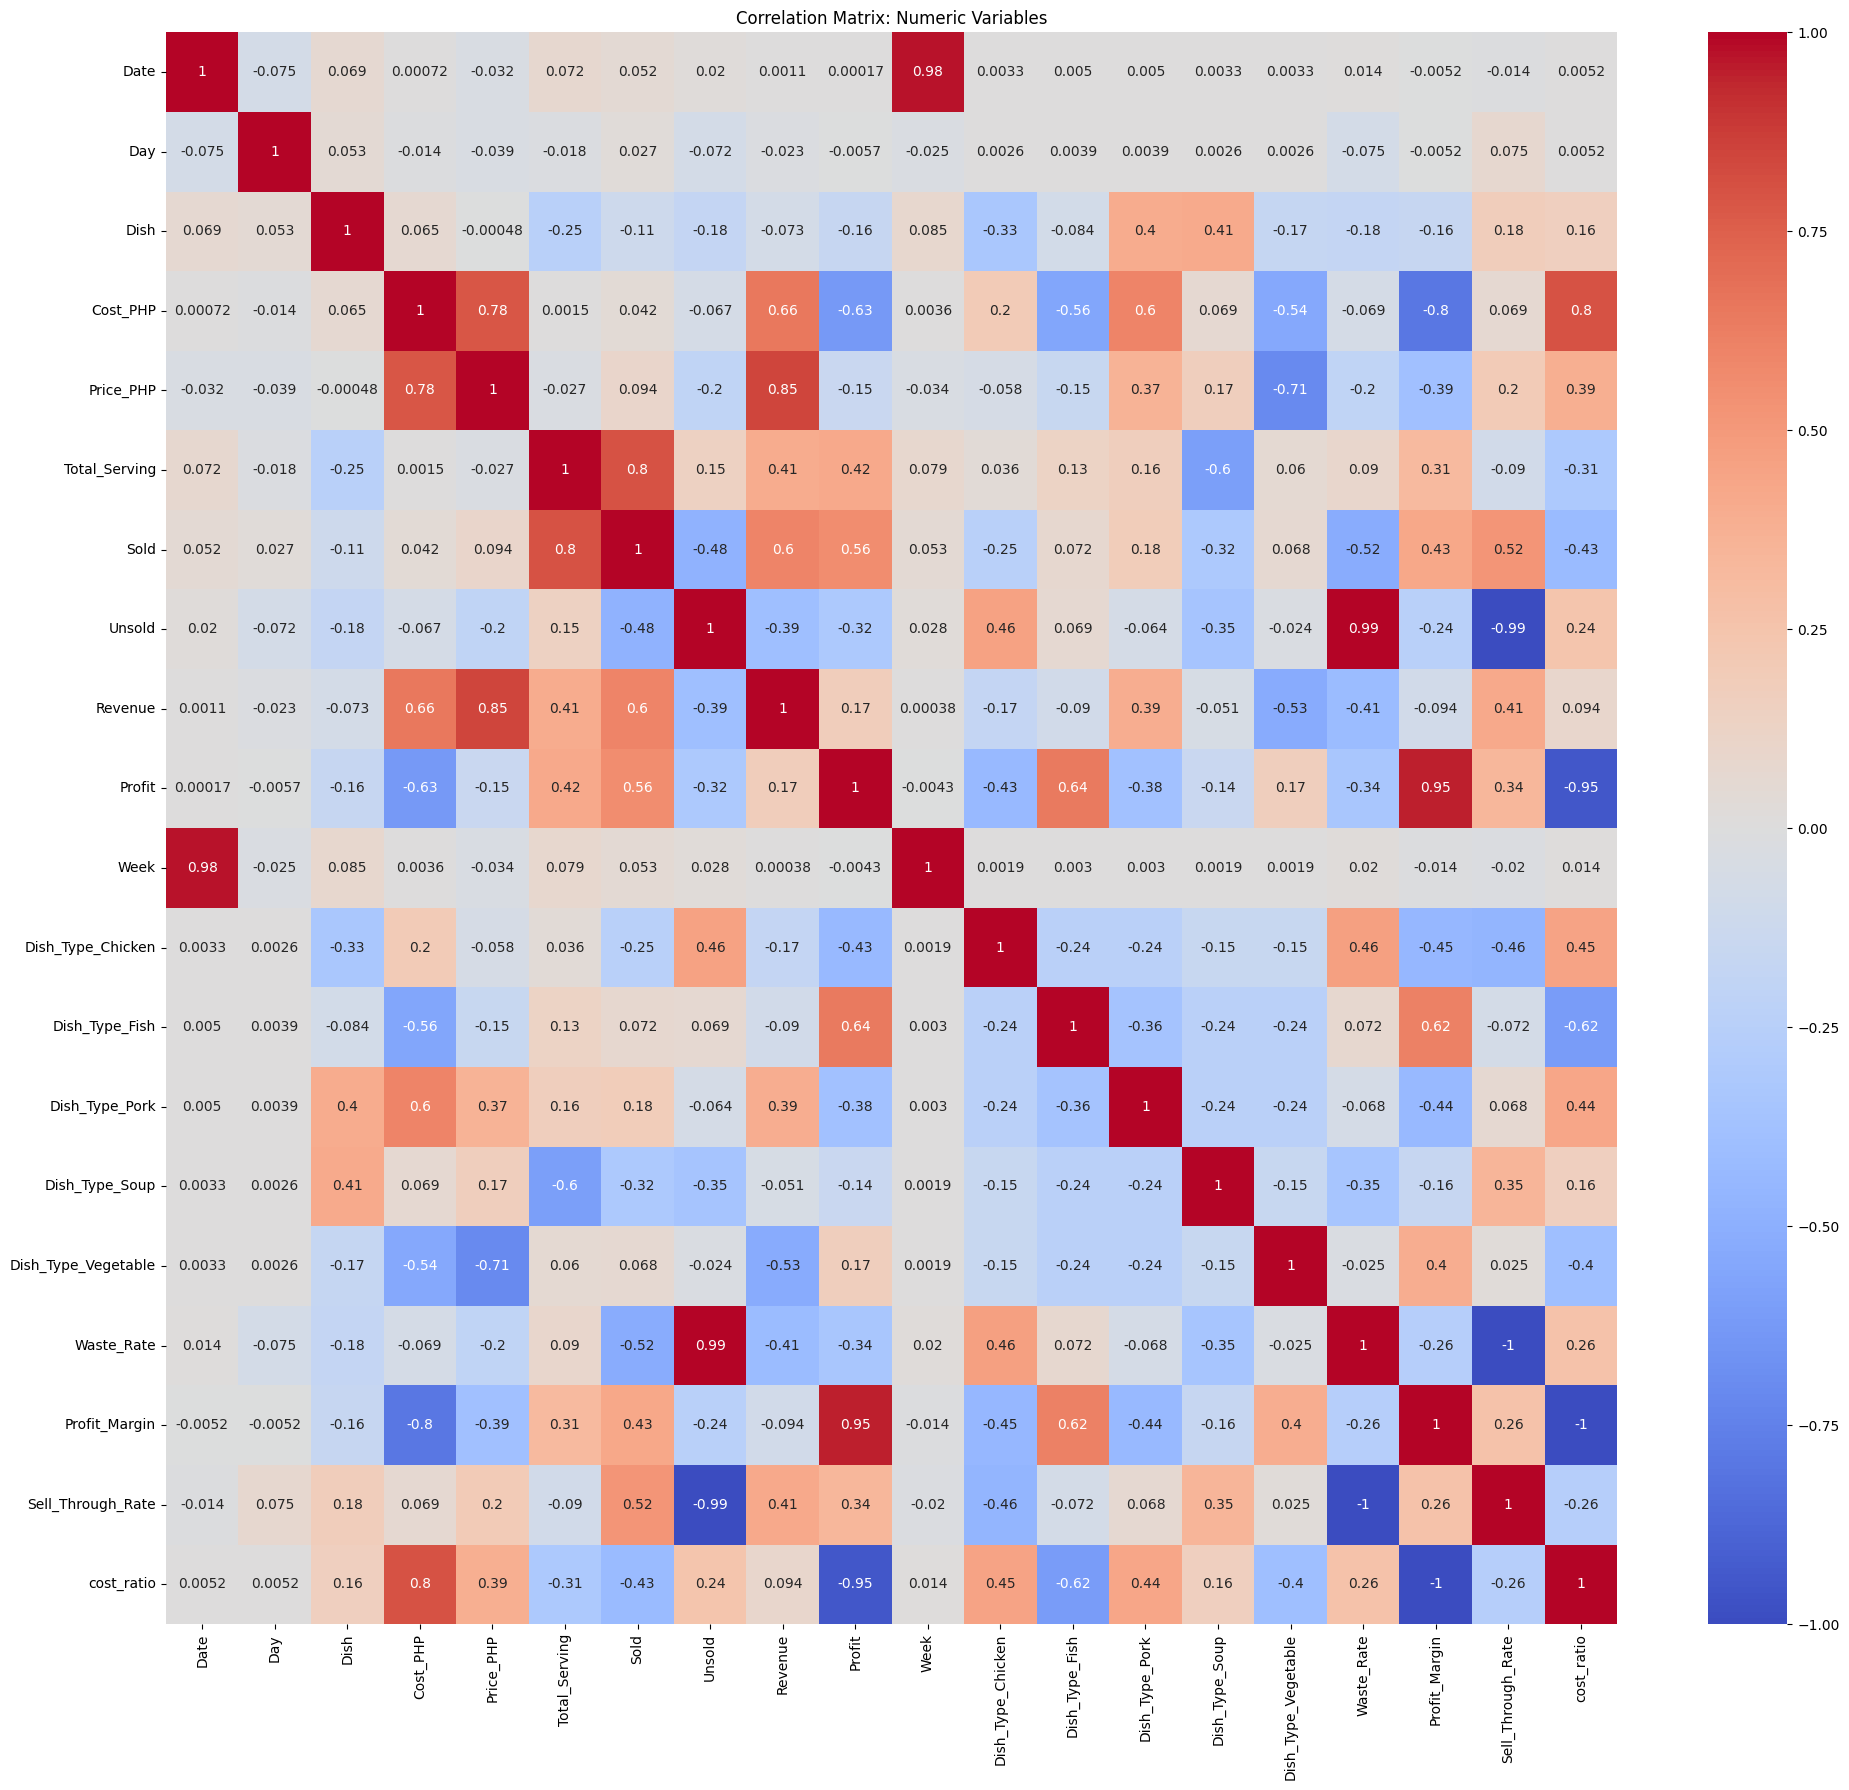

In [215]:
import seaborn as sns

correlation_matrix = data_encoded.corr()

fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix: Numeric Variables')
plt.tight_layout()
plt.show()


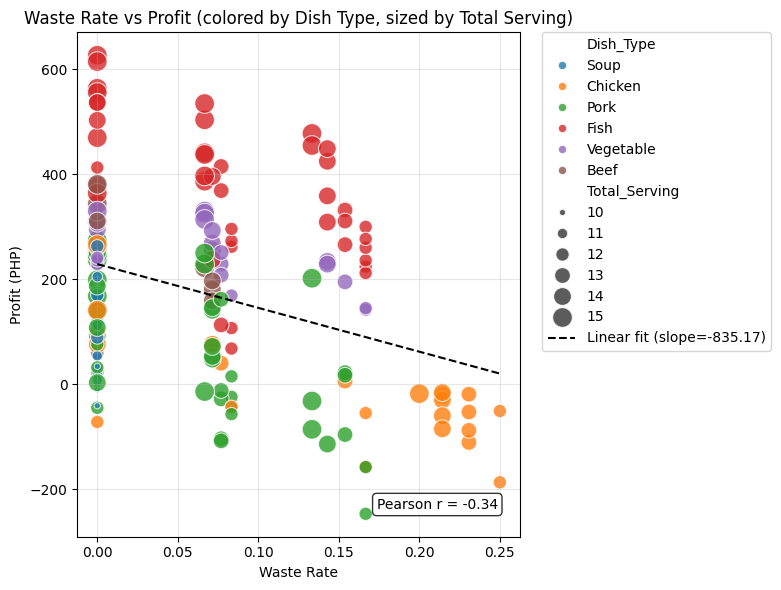

In [216]:
import seaborn as sns

# Scatter of Waste_Rate vs Profit with linear fit and Pearson r
mask = data[['Waste_Rate', 'Profit', 'Dish_Type', 'Total_Serving']].dropna()
r = mask['Waste_Rate'].corr(mask['Profit'])

fig_scatter, ax_scatter = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=mask,
    x='Waste_Rate',
    y='Profit',
    hue='Dish_Type',
    size='Total_Serving',
    palette='tab10',
    alpha=0.8,
    ax=ax_scatter,
    sizes=(20, 200),
    legend='brief'
)

# linear fit (only if enough points)
if len(mask) > 1:
    z = np.polyfit(mask['Waste_Rate'], mask['Profit'], 1)
    p = np.poly1d(z)
    xs = np.linspace(mask['Waste_Rate'].min(), mask['Waste_Rate'].max(), 100)
    ax_scatter.plot(xs, p(xs), color='black', linestyle='--', linewidth=1.5, label=f'Linear fit (slope={z[0]:.2f})')

# annotate correlation
ax_scatter.text(0.95, 0.05, f'Pearson r = {r:.2f}', transform=ax_scatter.transAxes,
                ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

ax_scatter.set_xlabel('Waste Rate')
ax_scatter.set_ylabel('Profit (PHP)')
ax_scatter.set_title('Waste Rate vs Profit (colored by Dish Type, sized by Total Serving)')
ax_scatter.grid(True, alpha=0.3)
ax_scatter.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()


plt.show()

In [217]:
from scipy.stats import pearsonr

corr, p = pearsonr(data["Waste_Rate"], data["Profit"])

print("Correlation:", corr)
print("p-value:", p)

Correlation: -0.3367754835657248
p-value: 3.7897041509431465e-06


In [218]:
#one way annova test
# H0: The mean profit is the same across all dish types.
# H1: At least one dish type has a different mean profit.

from scipy.stats import f_oneway

groups = [group["Profit"].values 
          for name, group in data.groupby("Dish_Type")]

f_stat, p = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p)

F-statistic: 57.26553477452114
p-value: 5.383500408599847e-35


H0 is false ; Each dish type has a unique mean profit  

In [222]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey HSD
tukey = pairwise_tukeyhsd(
    endog=data['Profit'],
    groups=data['Dish_Type'],
    alpha=0.05
)

# Convert results into DataFrame
tukey_df = pd.DataFrame(
    data=tukey.summary().data[1:],   # skip header row
    columns=tukey.summary().data[0]  # column names
)

# Convert numeric columns to float
numeric_cols = ['meandiff', 'p-adj', 'lower', 'upper']
tukey_df[numeric_cols] = tukey_df[numeric_cols].astype(float)

tukey_df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Beef,Chicken,-261.6667,0.0000,-375.3636,-147.9697,True
1,Beef,Fish,125.4375,0.0081,21.6469,229.2281,True
2,Beef,Pork,-177.4375,0.0000,-281.2281,-73.6469,True
3,Beef,Soup,-129.4167,0.0156,-243.1136,-15.7197,True
4,Beef,Vegetable,11.2500,0.9997,-102.4469,124.9469,False
5,Chicken,Fish,387.1042,0.0000,306.7083,467.5000,True
6,Chicken,Pork,84.2292,0.0341,3.8333,164.6250,True
7,Chicken,Soup,132.2500,0.0009,39.4168,225.0832,True
8,Chicken,Vegetable,272.9167,0.0000,180.0835,365.7498,True
9,Fish,Pork,-302.8750,0.0000,-368.5180,-237.2320,True


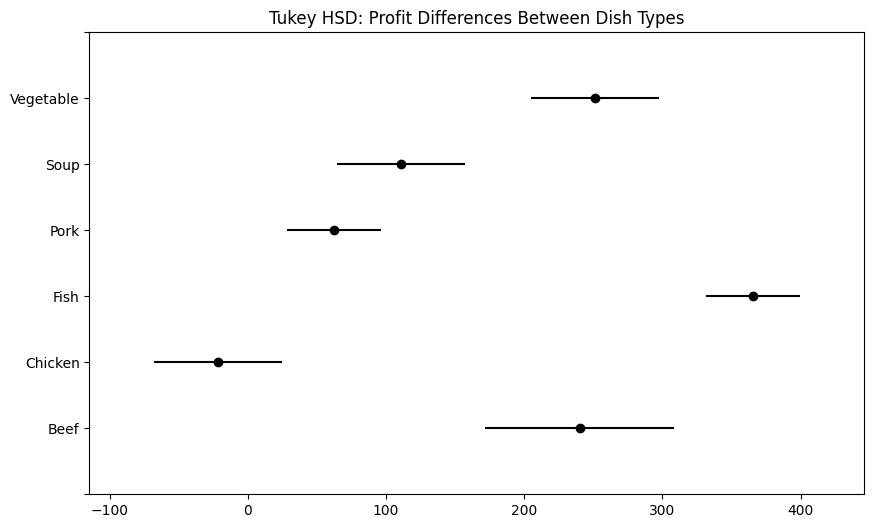

In [220]:
import matplotlib.pyplot as plt

tukey.plot_simultaneous()
plt.title("Tukey HSD: Profit Differences Between Dish Types")
plt.show()